In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report  
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import PolynomialFeatures

plt.rcParams['figure.figsize'] = (10,6)

In [169]:
df = pd.read_csv('../data/train.csv', index_col=0, parse_dates=True)

In [170]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [171]:
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday
df['month'] = df.index.month
df['year'] = df.index.year
df['year'] = df['year'] - 2011
df['month_count'] = df['month']+df['year']*12
df[df['month']==2]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday,month,year,month_count
datetime,,,,,,,,,,,,,,,,
2011-02-01 00:00:00,1,0,1,2,6.56,9.090,64,7.0015,2,6,8,0,1,2,0,2
2011-02-01 01:00:00,1,0,1,2,6.56,9.090,69,7.0015,0,3,3,1,1,2,0,2
2011-02-01 02:00:00,1,0,1,2,6.56,11.365,69,0.0000,0,2,2,2,1,2,0,2
2011-02-01 03:00:00,1,0,1,2,6.56,11.365,69,0.0000,0,2,2,3,1,2,0,2
2011-02-01 05:00:00,1,0,1,3,5.74,10.605,93,0.0000,0,3,3,5,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-02-19 19:00:00,1,0,0,2,12.30,14.395,52,16.9979,18,101,119,19,6,2,1,14
2012-02-19 20:00:00,1,0,0,2,12.30,14.395,52,19.0012,22,81,103,20,6,2,1,14
2012-02-19 21:00:00,1,0,0,3,10.66,12.880,65,11.0014,3,33,36,21,6,2,1,14


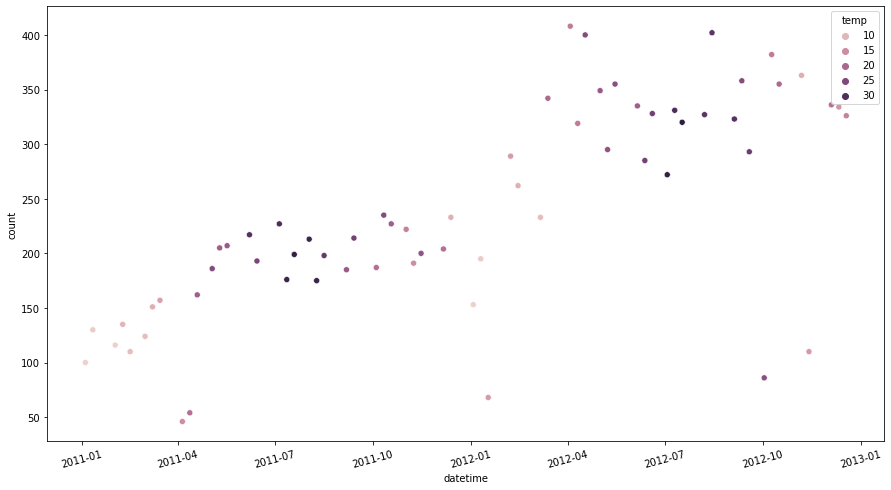

In [172]:
plt.figure(figsize=(15,8))#
sns.scatterplot(data =df[(df['hour']==9)&(df['weekday']==1)], x = 'datetime', y ='count',hue='temp')

plt.xticks(rotation=15)
#plt.ylabel('Temperature [C]')
#plt.xlabel('Date')
#plt.title('Max')
plt.show()

In [173]:
y = df['count']
X = df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'weekday', 'hour', 'month_count']]
X,y


(                     season  holiday  workingday  weather   temp   atemp  \
 datetime                                                                   
 2011-01-01 00:00:00       1        0           0        1   9.84  14.395   
 2011-01-01 01:00:00       1        0           0        1   9.02  13.635   
 2011-01-01 02:00:00       1        0           0        1   9.02  13.635   
 2011-01-01 03:00:00       1        0           0        1   9.84  14.395   
 2011-01-01 04:00:00       1        0           0        1   9.84  14.395   
 ...                     ...      ...         ...      ...    ...     ...   
 2012-12-19 19:00:00       4        0           1        1  15.58  19.695   
 2012-12-19 20:00:00       4        0           1        1  14.76  17.425   
 2012-12-19 21:00:00       4        0           1        1  13.94  15.910   
 2012-12-19 22:00:00       4        0           1        1  13.94  17.425   
 2012-12-19 23:00:00       4        0           1        1  13.12  16.665   

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,) #

In [175]:
ylog_train = np.log1p(y_train)
ylog_test = np.log1p(y_test)

In [176]:
X_train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'weekday', 'hour', 'month_count'],
      dtype='object')

In [177]:
numerical_pipeline = Pipeline([
    ('num_scaler',StandardScaler()),
    ('polynomial', PolynomialFeatures(degree= 2,)),
    #('num_discritazer',KBinsDiscretizer(n_bins=, strategy='uniform'),)
])

In [178]:
categorical_pipeline = Pipeline([
    ('categorical_ohe',OneHotEncoder(sparse=False,drop = 'first')),
    #
])

In [179]:
polynomial_pipeline_4 = Pipeline([
    ('polynomial', PolynomialFeatures(degree= 4,)),
    ('categorical_ohe',OneHotEncoder(sparse=False,drop = 'first')),
    
])

In [180]:
polynomial_pipeline_2 = Pipeline([
    ('polynomial', PolynomialFeatures(degree= 2,)),
    ('categorical_ohe',OneHotEncoder(sparse=False,drop = 'first')),
    
])

In [181]:
column_transformer = ColumnTransformer([
    ('numerical_pipeline',numerical_pipeline,['temp', ]), #'atemp', 'humidity',
    ('categorical_pipeline',categorical_pipeline,['hour', 'weekday', 'weather', 'holiday',]),#
    ('polynomial_4', polynomial_pipeline_4, ['season', 'workingday',]),
    ('polynomial_2', polynomial_pipeline_2, [ ]),
    ('do_nothing', 'passthrough',[ 'month_count',])
])

In [182]:
column_transformer.fit(X_train) #learn how to do the transforamtion
X_train_fe = column_transformer.transform(X_train) #Do the accual transformation
X_test_fe = column_transformer.transform(X_test) #Do the same transformation on test set 

In [183]:
m = LinearRegression()

In [184]:
m.fit(X_train_fe,ylog_train)

LinearRegression()

In [185]:
m.score(X_train_fe,ylog_train)

0.8392984642304199

In [186]:
from sklearn.model_selection import cross_val_score
mean_score = cross_val_score(m, X_train_fe, ylog_train,cv = 5).mean()
mean_score

0.8371733324203572

In [187]:
m.score(X_test_fe,ylog_test)

0.8120419641084554

In [188]:
y_predlog = m.predict(X_test_fe)

In [189]:
ypred = np.exp(y_predlog)-1

In [190]:

from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test, ypred)

0.36640522944664516

In [191]:
train_pred_log = m.predict(X_train_fe)
train_pred = np.exp(train_pred_log)-1 
diff = (train_pred - y_train)/y_train
diff.describe()

count    8708.000000
mean        0.255670
std         1.233706
min        -0.936329
25%        -0.301632
50%        -0.010152
75%         0.329788
max        21.344651
Name: count, dtype: float64

In [192]:
max = diff.max()

<AxesSubplot:xlabel='count', ylabel='Count'>

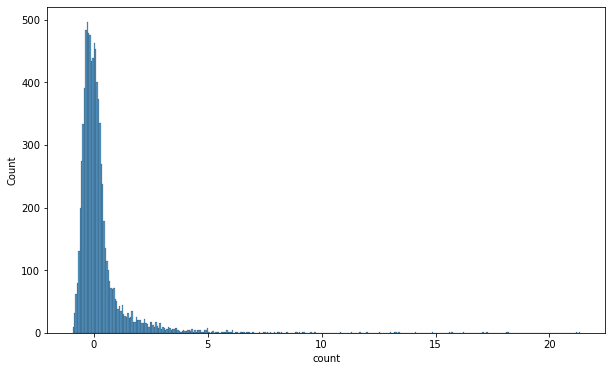

In [193]:
sns.histplot(diff)
#when negative train_pred is bigger than y_train. Thus model overestimates counts

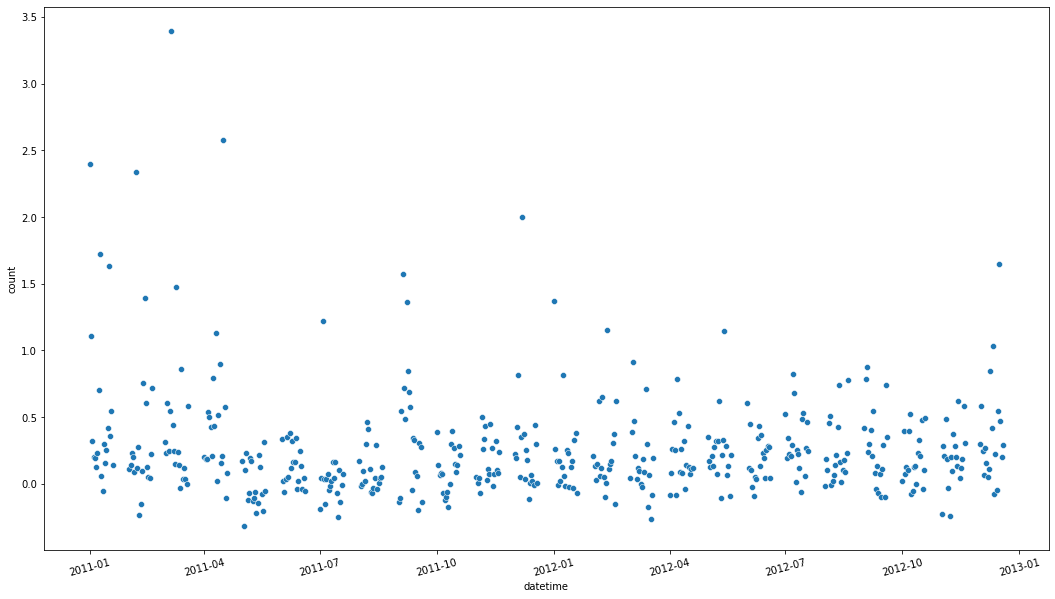

In [194]:
plt.figure(figsize=(18,10))#
#sns.scatterplot(data =df, x = 'datetime', y ='count', )
sns.scatterplot(data =X_train.resample('6h').mean(), x = 'datetime', y =diff.resample('D').mean())
plt.xticks(rotation=15)
#plt.ylabel('Temperature [C]')
#plt.xlabel('Date')
#plt.title('Max')
plt.show()

In [195]:
df_k = pd.read_csv('../data/test.csv', index_col=0, parse_dates=True)
df_k.shape

(6493, 8)

In [196]:
df_k['hour'] = df_k.index.hour
df_k['weekday'] = df_k.index.weekday
df_k['month'] = df_k.index.month
df_k['year'] = df_k.index.year
df_k['year'] = df_k['year'] - 2011
df_k['month_count'] = df_k['month']+df_k['year']*12
df_k.shape

(6493, 13)

In [197]:
X_test_kaggle = df_k[['season', 'holiday', 'workingday', 'weather', 'temp',
                     'atemp', 'humidity', 'windspeed', 'weekday', 'hour', 'month_count']]
X_test_kaggle.shape

(6493, 11)

In [198]:
X_test_kaggle_fe = column_transformer.transform(X_test_kaggle) #Do the same transformation on test set 
X_test_kaggle_fe.shape

(6493, 77)

In [199]:
y_predlog_k = m.predict(X_test_kaggle_fe)
y_predlog_k.shape


(6493,)

In [200]:
ypred_k = np.exp(y_predlog_k)-1
ypred_k

array([ 18.46256901,   9.46012406,   5.44882302, ..., 152.38497873,
       119.72469954,  80.01654465])

In [201]:
df_s = pd.read_csv('../data/sampleSubmission.csv', index_col=0, parse_dates=True)
df_s['count']

datetime
2011-01-20 00:00:00    0
2011-01-20 01:00:00    0
2011-01-20 02:00:00    0
2011-01-20 03:00:00    0
2011-01-20 04:00:00    0
                      ..
2012-12-31 19:00:00    0
2012-12-31 20:00:00    0
2012-12-31 21:00:00    0
2012-12-31 22:00:00    0
2012-12-31 23:00:00    0
Name: count, Length: 6493, dtype: int64

In [202]:
df_s['count'] = ypred_k
df_s.head()

,count
datetime,
2011-01-20 00:00:00,18.462569
2011-01-20 01:00:00,9.460124
2011-01-20 02:00:00,5.448823
2011-01-20 03:00:00,2.866582
2011-01-20 04:00:00,1.986459


In [203]:
pd.DataFrame(df_s).to_csv("predictions")